In [15]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read files
income_data = pd.read_csv('Resources/Income Ranges by Province.csv')
grad_school_data = pd.read_csv('Resources/Grad_Canada_Data.csv')
gender_data = pd.read_csv('Resources/Gender Type and Education Level.csv')

In [16]:
#clean the data, set the index
income_data = income_data.rename(columns={'Unnamed: 0': 'Province'})
income_data_clean = income_data.set_index('Province')
income_data_clean

,Income Under 30k,Income 30k - 60k,Income 60k - 100k,Income 100k - 200k,Income Over 200k
Province,,,,,
Quebec,71580,443825,708890,885030,214080
Ontario,168780,661800,1047750,1531890,559445
Alberta,45100,171735,295590,470795,181425
British Columbia,64815,244590,376870,542310,170830
Total Counts,350275,1521950,2429100,3430025,1125780


In [56]:
# clean the data - remove all irrelevant rows
grad_school_data = grad_school_data.dropna(axis='columns', how='all')
grad_school_clean = grad_school_data.dropna(axis='index', how='all')
grad_school_df = grad_school_clean.rename(columns={'Highest certificate, diploma or degree': 'Highest Education'})
grad_school_df = grad_school_df.set_index('Highest Education')
grad_school_clean_df = grad_school_df.rename(index={'Degree in medicine, dentistry, veterinary medicine or optometry': 'Medical Degree', "Master's degree": "Master's Degree"})
grad_school_clean_df

,Canada,Quebec,Ontario,Alberta,British Columbia
Highest Education,,,,,
Medical Degree,"214,110","43,755","90,530","23,875","32,985"
Master's Degree,"1,740,600","360,795","786,435","164,245","264,145"
Earned doctorate,"279,665","63,275","119,120","27,315","43,440"
Total,"2,234,375","467,825","996,085","215,435","340,570"


In [57]:
#transpose and clean
grad_school_transposed = grad_school_clean_df.transpose()
grad_school_final = grad_school_transposed.rename_axis('Province')
grad_school_final = grad_school_final.rename(columns={'Total':'Total Post Grad Students'})
grad_school_final['Earned doctorate'] = grad_school_final['Earned doctorate'].replace(',', '', regex=True).astype(int)
grad_school_final

KeyError: 'Earned doctorate'

In [19]:
#clean gender data and create df with only total population
# gender_data.head()
total_population = gender_data.loc[gender_data['Description']== 'Total population']
total_population = total_population.rename(columns={'Province/Territory':'Province'})
population_data = total_population.loc[(total_population['Province'] == 'Ontario') |
                                      (total_population['Province'] == 'Alberta') |
                                      (total_population['Province'] == 'British Columbia') |
                                      (total_population['Province'] == 'Quebec')]

population_data

,Province,Description,Total,Male,Female
16,Quebec,Total population,8501835,4201960,4299870
20,Ontario,Total population,14223945,6970855,7253085
32,Alberta,Total population,4262635,2127935,2134700
36,British Columbia,Total population,5000880,2457515,2543365


In [27]:
#select relevant columns and make a new dataframe
final_population = population_data[['Province','Total']]
final_population = final_population.rename(columns={'Total': 'Total Population'})
final_population.set_index('Province')

,Total Population
Province,
Quebec,8501835
Ontario,14223945
Alberta,4262635
British Columbia,5000880


In [49]:
# merge the datasets
merged_df = pd.merge(income_data_clean, grad_school_final, how='inner', on='Province')
merged_df[['Medical Degree', "Master's Degree", 'Total Post Grad Students']] = merged_df[['Medical Degree', "Master's Degree",'Total Post Grad Students']].replace(',', '', regex=True).astype(int)
merged_df

,Income Under 30k,Income 30k - 60k,Income 60k - 100k,Income 100k - 200k,Income Over 200k,Medical Degree,Master's Degree,Earned doctorate,Total Post Grad Students
Province,,,,,,,,,
Quebec,71580,443825,708890,885030,214080,43755,360795,"63,275",467825
Ontario,168780,661800,1047750,1531890,559445,90530,786435,"119,120",996085
Alberta,45100,171735,295590,470795,181425,23875,164245,"27,315",215435
British Columbia,64815,244590,376870,542310,170830,32985,264145,"43,440",340570


In [51]:
combined_df = pd.merge(merged_df, final_population, how='inner', on='Province')
combined_df = combined_df.set_index('Province')
combined_df

,Income Under 30k,Income 30k - 60k,Income 60k - 100k,Income 100k - 200k,Income Over 200k,Medical Degree,Master's Degree,Earned doctorate,Total Post Grad Students,Total Population
Province,,,,,,,,,,
Quebec,71580,443825,708890,885030,214080,43755,360795,"63,275",467825,8501835
Ontario,168780,661800,1047750,1531890,559445,90530,786435,"119,120",996085,14223945
Alberta,45100,171735,295590,470795,181425,23875,164245,"27,315",215435,4262635
British Columbia,64815,244590,376870,542310,170830,32985,264145,"43,440",340570,5000880


In [52]:
# find the ratio of post grad and income 100k - 200k
combined_df['Post Grad Per Capita'] = combined_df['Total Post Grad Students'] / combined_df['Total Population']
combined_df['100k - 200k Per Capita'] = combined_df['Income 100k - 200k'] / combined_df['Total Population']
combined_df

,Income Under 30k,Income 30k - 60k,Income 60k - 100k,Income 100k - 200k,Income Over 200k,Medical Degree,Master's Degree,Earned doctorate,Total Post Grad Students,Total Population,Post Grad Per Capita,100k - 200k Per Capita
Province,,,,,,,,,,,,
Quebec,71580,443825,708890,885030,214080,43755,360795,"63,275",467825,8501835,0.055026,0.104099
Ontario,168780,661800,1047750,1531890,559445,90530,786435,"119,120",996085,14223945,0.070029,0.107698
Alberta,45100,171735,295590,470795,181425,23875,164245,"27,315",215435,4262635,0.050540,0.110447
British Columbia,64815,244590,376870,542310,170830,32985,264145,"43,440",340570,5000880,0.068102,0.108443


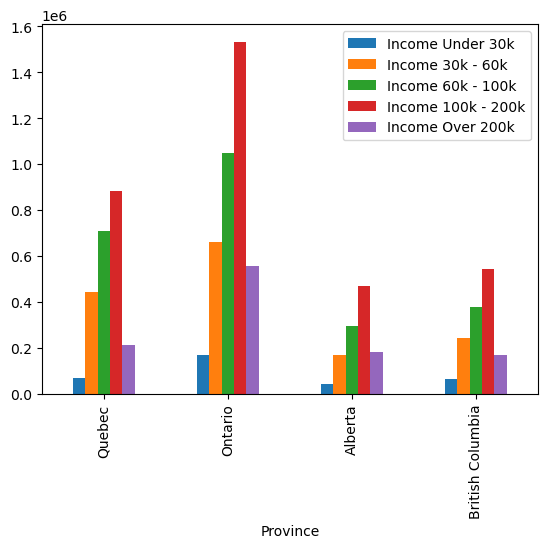

In [39]:
# plot graphs

income_graph = combined_df[['Income Under 30k', 'Income 30k - 60k', 'Income 60k - 100k', 'Income 100k - 200k', 'Income Over 200k']]
income_graph.plot(kind='bar')

plt.show()

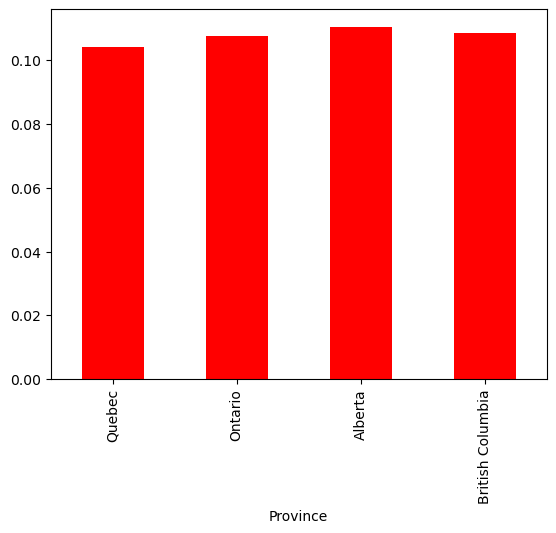

In [54]:
income_percapita_graph = combined_df['100k - 200k Per Capita']
income_percapita_graph.plot(kind='bar', color='red')
plt.show()

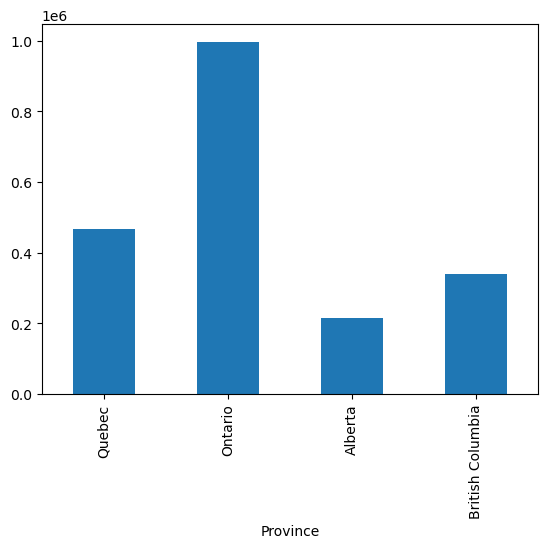

In [40]:
grad_graph = combined_df['Total Post Grad Students']

grad_graph.plot(kind='bar')
plt.show()

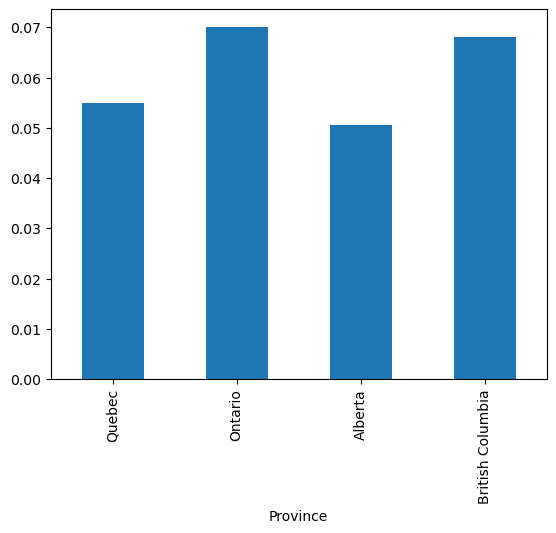

In [43]:
percapita_graph = combined_df['Post Grad Per Capita']

percapita_graph.plot(kind='bar')
plt.show()